In [0]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import glob
import cv2

%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, SpatialDropout2D, ZeroPadding2D
from keras.optimizers import Adam
from keras.applications import VGG16

import os
import random

In [13]:
#Mounting google drive into google collaboratory
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [14]:
!ls '/content/drive/My Drive/Colab Notebooks/Research/Data'

coordinate_data.csv  image_data.gsheet	original.jpg
image_data.csv	     nuclei.csv


In [0]:
#Specifying the data path
img_path = "/content/drive/My Drive/Colab Notebooks/Research/Data/original.jpg"

In [0]:
#Creating a function to preprocess images
def preprocess(image):
    
    #Reading the image
    img = cv2.imread(image)
    
    #Resizing all images to a size of 128 x 128
    img = cv2.resize(img, (128,128))
    
    #Returning the image
    return img

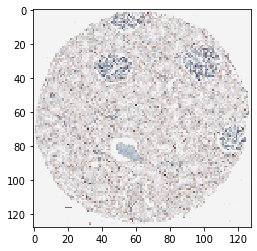

In [17]:
#Preprocessing the image
img = preprocess(img_path)
plt.imshow(img)

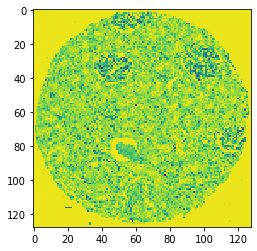

In [18]:
#Copying the image into a temporary image
test_img = np.copy(img)

#Converting the copied image into grayscale
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

#Plotting the grayscale image
plt.imshow(gray_img)

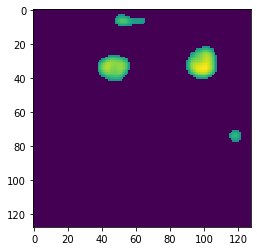

In [70]:
#Using mean filtering to remove noise
blur_img = cv2.blur(gray_img, (5,5))

#Changing the color of pixel values greater than 200 to black
blur_img[(blur_img >= 200)] = 0

#Recursively using mean filtering to remove noise
blur_img = cv2.blur(blur_img, (5,5))
blur_img = cv2.blur(blur_img, (5,5))
blur_img = cv2.blur(blur_img, (5,5))
blur_img = cv2.blur(blur_img, (5,5))
blur_img = cv2.blur(blur_img, (5,5))

#Changing the color of pixel values less than 80 to black
blur_img[(blur_img <= 80)] = 0

#Plotting the image with reduced noise
plt.imshow(blur_img)

In [0]:
#Converting the smoothened image into a Dataframe
image_data = pd.DataFrame(blur_img)

#Converting it into a csv file
image_data.to_csv("/content/drive/My Drive/Colab Notebooks/Research/Data/coordinate_data_without_index.csv", index = False)

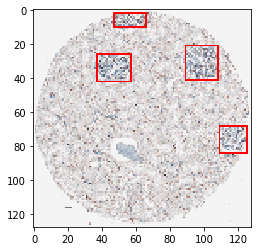

In [78]:
#Copying the original image
temp_data = np.copy(img)

#Drawing rectangles around the nuclei
cv2.rectangle(temp_data, (47,2), (66,10), (255,0,0))
cv2.rectangle(temp_data, (37,26), (57,42), (255,0,0))
cv2.rectangle(temp_data, (89,21), (108,41), (255,0,0))
cv2.rectangle(temp_data, (109,68), (125,84), (255,0,0))

#Plotting the data with boxes
plt.imshow(temp_data)

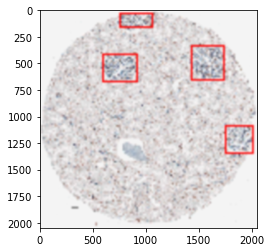

In [90]:
#Upsampling the image
temp_data = cv2.pyrUp(temp_data)
temp_data = cv2.pyrUp(temp_data)

#PLotting the sampled image
plt.imshow(temp_data)